In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
file_names = ['火力发电量', '原煤产量', '企业单位数','工业增长']
data_frames = []  # 用于存储每个文件的 DataFrame

for file_name in file_names:
    data = pd.read_csv('./关联分析/{}.csv'.format(file_name), encoding='gbk', skiprows=3)
    melted_data = pd.melt(data, id_vars='地区')
    melted_data = melted_data.rename(columns={'variable': '时间', 'value': file_name})
    merged_data = melted_data[melted_data['时间'].str[:4].astype(int) < 2019]
    data_frames.append(merged_data)  # 将每个文件的 DataFrame 添加到列表中

# 合并所有 DataFrame
result = data_frames[0]  # 假设第一个 DataFrame 用作初始值

for df in data_frames[1:]:
    result = pd.merge(result, df, on=['地区', '时间'])
# df = result.dropna()


In [132]:
df

,地区,时间,火力发电量,原煤产量,企业单位数,工业增长
0,北京市,2018年12月,48.1,176.2,3197.0,-2.8
1,天津市,2018年12月,68.4,0.0,4292.0,0.8
2,河北省,2018年12月,255.9,5505.3,14943.0,8.1
3,山西省,2018年12月,273.4,89340.0,3875.0,3.0
4,内蒙古自治区,2018年12月,359.5,92597.9,2832.0,5.2
...,...,...,...,...,...,...
1466,陕西省,2015年3月,126.6,10879.1,4901.0,3.1
1467,甘肃省,2015年3月,67.0,1010.8,1998.0,7.1
1468,青海省,2015年3月,11.8,124.2,524.0,6.1
1469,宁夏回族自治区,2015年3月,77.6,1734.8,1139.0,7.3


c:\Users\16217\.conda\envs\visual\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\16217\.conda\envs\visual\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\16217\.conda\envs\visual\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\16217\.conda\envs\visual\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

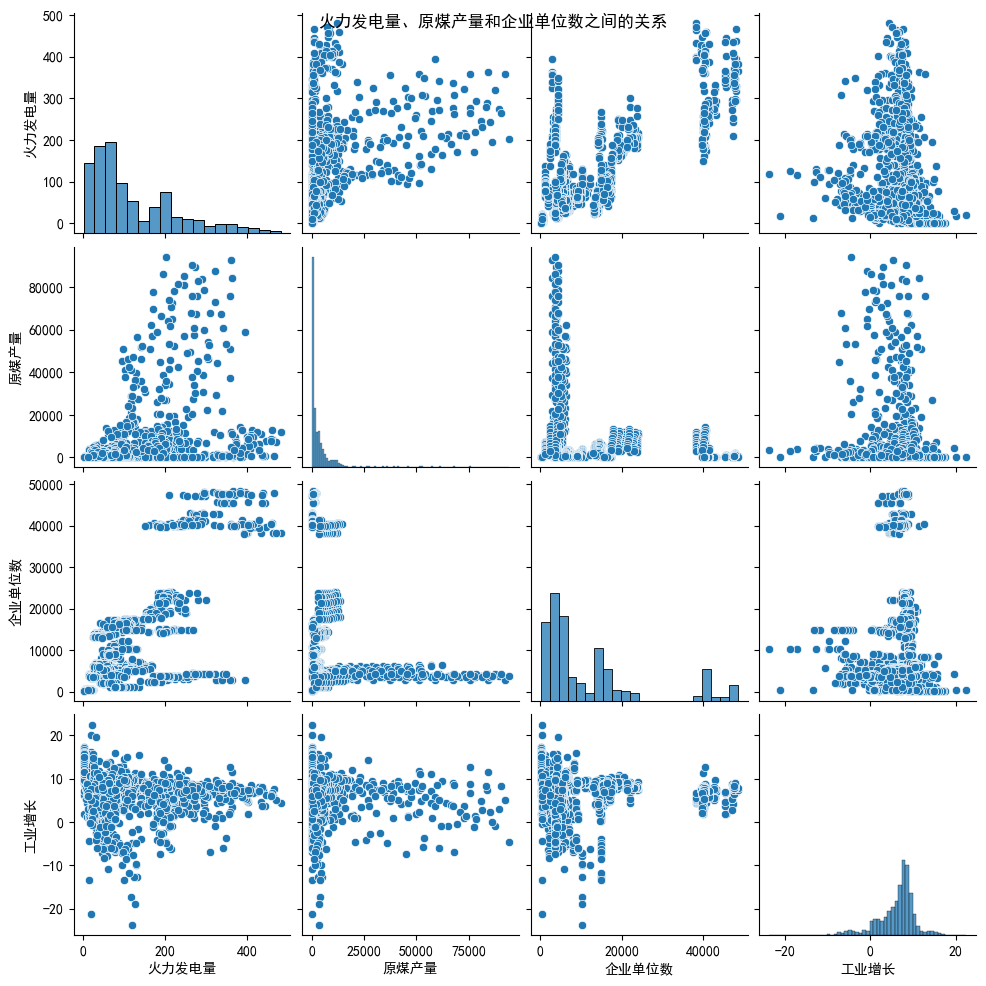

In [128]:
selected_data = df[file_names]
sns.pairplot(selected_data)
plt.suptitle('火力发电量、原煤产量和企业单位数之间的关系')
plt.show()

In [131]:
df

,地区,时间,火力发电量,原煤产量,企业单位数,工业增长
0,北京市,2018年12月,48.1,176.2,3197.0,-2.8
1,天津市,2018年12月,68.4,0.0,4292.0,0.8
2,河北省,2018年12月,255.9,5505.3,14943.0,8.1
3,山西省,2018年12月,273.4,89340.0,3875.0,3.0
4,内蒙古自治区,2018年12月,359.5,92597.9,2832.0,5.2
...,...,...,...,...,...,...
1466,陕西省,2015年3月,126.6,10879.1,4901.0,3.1
1467,甘肃省,2015年3月,67.0,1010.8,1998.0,7.1
1468,青海省,2015年3月,11.8,124.2,524.0,6.1
1469,宁夏回族自治区,2015年3月,77.6,1734.8,1139.0,7.3


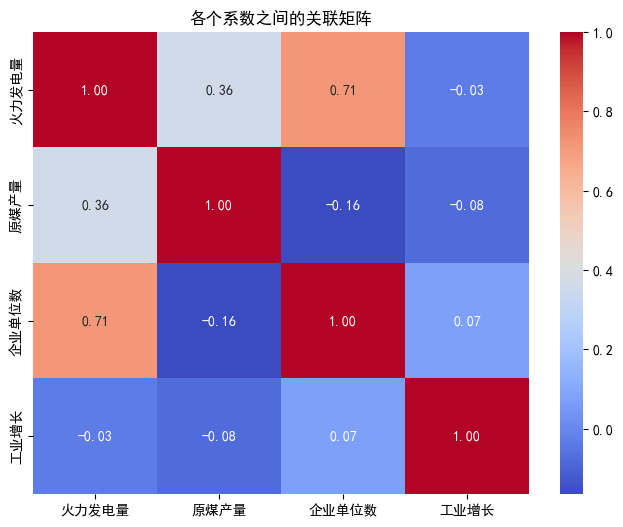

In [130]:
correlation_matrix = selected_data.corr()

# 绘制关联矩阵（热图）
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各个系数之间的关联矩阵')
plt.show()
